In [26]:
%run utils.ipynb 
%run models.ipynb

In [27]:
#df = pd.read_csv('../data/clean_union_fe_c2_04_28_20_21_00.csv')
df = pd.read_csv('data/clean_union_fe_c2_04_28_20_21_00.csv')
df.shape

(13143, 12)

In [28]:
df.sample(5)

,name,device_type,box_id,false_character,hold_for,key_pressed,long_pressed_equivalent,platform,pressed_after,type_combination,effort,speed
6274,Shalom,Computer/Laptop,#text-area-2,ff,176,im,2,MacIntel,171,ll,263,0.0460
1584,Bunmi,Mobile/Tab,#text-area-2,ff,35,th,2,iPhone,326,ll,176,0.0851
2419,Goddess,Computer/Laptop,#text-area-3,ff,256,f,2,Win32,1836,ol,685,0.1632
3380,Adesola Ajisafe,Mobile/Tab,#text-area-1,ff,43,u,2,iPhone,346,lo,220,0.4802
10420,Vikas Ramaneti,Computer/Laptop,#text-area-2,tt,136,on,2,MacIntel,259,ll,252,0.0086


In [29]:
models = Models(df.copy(), 0.2, False)
models_b = Models(df.copy(), 0.2, True)

** Non-numeric columns encoded
** Unbalanced stratified per class train_test split
(10514, 11) (2629, 11) (10514,) (2629,)
** Non-numeric columns encoded
** Balanced stratified per class train_test split
(7368, 11) (1842, 11) (7368,) (1842,)


In [30]:
split = pd.DataFrame(list(zip(models.df['name'].value_counts().sort_index(), models.y_train.value_counts().sort_index(), models.y_test.value_counts().sort_index())), columns=['total','train','test'])
split['train_perc'] = split['train']/(split['train']+split['test'])
split['test_perc'] = split['test']/(split['train']+split['test'])
split

,total,train,test,train_perc,test_perc
0,648,519,129,0.800926,0.199074
1,952,762,190,0.800420,0.199580
2,624,499,125,0.799679,0.200321
3,1208,966,242,0.799669,0.200331
4,825,660,165,0.800000,0.200000
5,659,527,132,0.799697,0.200303
6,657,526,131,0.800609,0.199391
7,725,580,145,0.800000,0.200000
8,614,491,123,0.799674,0.200326
9,1610,1288,322,0.800000,0.200000


In [31]:
split_bal = pd.DataFrame(list(zip(models_b.df['name'].value_counts().sort_index(), models_b.y_train.value_counts().sort_index(), models_b.y_test.value_counts().sort_index())), columns=['total','train','test'])
split_bal['train_perc'] = split_bal['train']/(split_bal['train']+split_bal['test'])
split_bal['test_perc'] = split_bal['test']/(split_bal['train']+split_bal['test'])
split_bal

,total,train,test,train_perc,test_perc
0,648,491,123,0.799674,0.200326
1,952,491,123,0.799674,0.200326
2,624,491,123,0.799674,0.200326
3,1208,491,123,0.799674,0.200326
4,825,491,123,0.799674,0.200326
5,659,492,122,0.801303,0.198697
6,657,491,123,0.799674,0.200326
7,725,492,122,0.801303,0.198697
8,614,491,123,0.799674,0.200326
9,1610,491,123,0.799674,0.200326


In [32]:
model_results = pd.DataFrame()

In [50]:
model_balanced_results = pd.DataFrame()

## Naive Bayes Unbalanced

In [33]:
gnb, y_pred = models.NB()
models.accuracy_score(y_pred)

0.4

In [34]:
print(models.classification_report(y_pred))

              precision    recall  f1-score   support

           0       0.29      0.04      0.07       129
           1       0.18      0.25      0.21       190
           2       0.49      0.42      0.45       125
           3       0.29      0.05      0.08       242
           4       0.39      0.50      0.44       165
           5       0.44      0.06      0.11       132
           6       0.34      0.69      0.46       131
           7       0.23      0.87      0.37       145
           8       0.41      0.24      0.31       123
           9       1.00      1.00      1.00       322
          10       0.51      0.44      0.47       190
          11       0.25      0.75      0.37       141
          12       0.34      0.05      0.09       220
          13       0.51      0.28      0.36       217
          14       0.40      0.10      0.16       157

    accuracy                           0.40      2629
   macro avg       0.41      0.38      0.33      2629
weighted avg       0.44   

In [35]:
model_results = model_results.append(models.class_score(y_pred, 'Naive Bayes'))
# model_results

## Naive Bayes Balanced

In [52]:
gnb, y_pred = models_b.NB()
models_b.accuracy_score(y_pred)

0.4

In [53]:
print(models_b.classification_report(y_pred))

              precision    recall  f1-score   support

           0       0.32      0.05      0.08       123
           1       0.15      0.15      0.15       123
           2       0.58      0.50      0.54       123
           3       0.33      0.03      0.06       123
           4       0.38      0.59      0.46       123
           5       0.50      0.06      0.10       122
           6       0.37      0.72      0.49       123
           7       0.28      0.85      0.42       122
           8       0.57      0.25      0.35       123
           9       1.00      1.00      1.00       123
          10       0.44      0.50      0.47       123
          11       0.29      0.72      0.41       122
          12       0.38      0.10      0.15       123
          13       0.51      0.27      0.35       123
          14       0.55      0.13      0.21       123

    accuracy                           0.40      1842
   macro avg       0.44      0.40      0.35      1842
weighted avg       0.44   

In [54]:
model_balanced_results = model_balanced_results.append(models_b.class_score(y_pred, 'Naive Bayes'))

## Logistic Regression Unbalanced

In [36]:
lr, y_pred = models.LR()
models.accuracy_score(y_pred)

0.46

In [37]:
print(models.classification_report(y_pred))

              precision    recall  f1-score   support

           0       0.45      0.58      0.51       129
           1       0.18      0.12      0.14       190
           2       0.65      0.58      0.62       125
           3       0.34      0.67      0.45       242
           4       0.39      0.59      0.47       165
           5       0.38      0.07      0.12       132
           6       0.44      0.35      0.39       131
           7       0.28      0.08      0.12       145
           8       0.58      0.17      0.26       123
           9       0.98      1.00      0.99       322
          10       0.56      0.39      0.46       190
          11       0.43      0.34      0.38       141
          12       0.28      0.50      0.36       220
          13       0.44      0.31      0.36       217
          14       0.46      0.51      0.48       157

    accuracy                           0.46      2629
   macro avg       0.46      0.42      0.41      2629
weighted avg       0.48   

In [38]:
model_results = model_results.append(models.class_score(y_pred, 'Logistic Regression'))

## Logistic Regression Balanced

In [56]:
lr, y_pred = models_b.LR()
models_b.accuracy_score(y_pred)

0.46

In [57]:
print(models_b.classification_report(y_pred))

              precision    recall  f1-score   support

           0       0.50      0.69      0.58       123
           1       0.23      0.08      0.12       123
           2       0.65      0.72      0.69       123
           3       0.20      0.07      0.10       123
           4       0.39      0.67      0.49       123
           5       0.26      0.20      0.22       122
           6       0.48      0.25      0.33       123
           7       0.33      0.39      0.35       122
           8       0.37      0.53      0.44       123
           9       0.99      1.00      1.00       123
          10       0.51      0.37      0.43       123
          11       0.46      0.62      0.53       122
          12       0.36      0.40      0.38       123
          13       0.47      0.33      0.38       123
          14       0.41      0.54      0.47       123

    accuracy                           0.46      1842
   macro avg       0.44      0.46      0.43      1842
weighted avg       0.44   

In [58]:
model_balanced_results = model_balanced_results.append(models_b.class_score(y_pred, 'Logistic Regression'))

## Random Forest Unbalanced

In [39]:
rf, y_pred = models.RF()
models.accuracy_score(y_pred)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


Average number of nodes 5772
Average maximum depth 30
hold_for                   0.202076
platform                   0.141181
pressed_after              0.131353
effort                     0.130764
speed                      0.118506
key_pressed                0.105809
device_type                0.074254
box_id                     0.041147
false_character            0.031893
type_combination           0.023018
long_pressed_equivalent    0.000000
dtype: float64


0.71

In [40]:
print(models.classification_report(y_pred))

              precision    recall  f1-score   support

           0       0.67      0.64      0.65       129
           1       0.76      0.87      0.81       190
           2       0.65      0.86      0.74       125
           3       0.63      0.86      0.73       242
           4       0.67      0.72      0.69       165
           5       0.56      0.29      0.38       132
           6       0.62      0.46      0.53       131
           7       0.44      0.37      0.40       145
           8       0.61      0.46      0.52       123
           9       1.00      1.00      1.00       322
          10       0.68      0.57      0.62       190
          11       0.67      0.58      0.62       141
          12       0.78      0.89      0.83       220
          13       0.82      0.86      0.84       217
          14       0.60      0.57      0.58       157

    accuracy                           0.71      2629
   macro avg       0.68      0.67      0.66      2629
weighted avg       0.71   

In [41]:
model_results = model_results.append(models.class_score(y_pred, 'Random Forest'))

## Random Forest Balanced

In [59]:
rf, y_pred = models_b.RF()
models_b.accuracy_score(y_pred)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


Average number of nodes 4500
Average maximum depth 28
hold_for                   0.209847
effort                     0.135047
pressed_after              0.134761
speed                      0.123173
platform                   0.117818
key_pressed                0.108789
device_type                0.067279
box_id                     0.043447
false_character            0.034840
type_combination           0.025001
long_pressed_equivalent    0.000000
dtype: float64


0.61

In [60]:
print(models_b.classification_report(y_pred))

              precision    recall  f1-score   support

           0       0.65      0.65      0.65       123
           1       0.70      0.65      0.67       123
           2       0.67      0.82      0.74       123
           3       0.53      0.53      0.53       123
           4       0.51      0.63      0.57       123
           5       0.42      0.34      0.38       122
           6       0.60      0.46      0.52       123
           7       0.42      0.47      0.44       122
           8       0.49      0.61      0.54       123
           9       1.00      1.00      1.00       123
          10       0.71      0.46      0.56       123
          11       0.60      0.61      0.61       122
          12       0.60      0.63      0.62       123
          13       0.70      0.65      0.67       123
          14       0.57      0.57      0.57       123

    accuracy                           0.61      1842
   macro avg       0.61      0.61      0.60      1842
weighted avg       0.61   

In [61]:
model_balanced_results = model_balanced_results.append(models_b.class_score(y_pred, 'Random Forest'))

## SVM Unbalanced

In [42]:
svm, y_pred = models.SVM()
models.accuracy_score(y_pred)

0.47

In [43]:
print(models.classification_report(y_pred))

              precision    recall  f1-score   support

           0       0.25      0.09      0.14       129
           1       0.21      0.18      0.19       190
           2       0.67      0.73      0.70       125
           3       0.33      0.66      0.44       242
           4       0.43      0.58      0.49       165
           5       0.26      0.08      0.12       132
           6       0.37      0.57      0.45       131
           7       0.33      0.01      0.03       145
           8       0.54      0.24      0.33       123
           9       1.00      1.00      1.00       322
          10       0.62      0.35      0.45       190
          11       0.39      0.55      0.46       141
          12       0.30      0.45      0.36       220
          13       0.53      0.29      0.37       217
          14       0.45      0.60      0.51       157

    accuracy                           0.47      2629
   macro avg       0.45      0.43      0.40      2629
weighted avg       0.48   

In [44]:
model_results = model_results.append(models.class_score(y_pred, 'SVM'))

## SVM Balanced

In [62]:
svm, y_pred = models_b.SVM()
models_b.accuracy_score(y_pred)

0.47

In [63]:
print(models_b.classification_report(y_pred))

              precision    recall  f1-score   support

           0       0.48      0.28      0.36       123
           1       0.21      0.15      0.17       123
           2       0.67      0.76      0.71       123
           3       0.40      0.19      0.26       123
           4       0.40      0.59      0.48       123
           5       0.26      0.14      0.18       122
           6       0.45      0.57      0.50       123
           7       0.34      0.47      0.39       122
           8       0.42      0.51      0.46       123
           9       1.00      1.00      1.00       123
          10       0.63      0.36      0.46       123
          11       0.43      0.63      0.51       122
          12       0.35      0.44      0.39       123
          13       0.56      0.31      0.40       123
          14       0.45      0.63      0.53       123

    accuracy                           0.47      1842
   macro avg       0.47      0.47      0.45      1842
weighted avg       0.47   

In [64]:
model_balanced_results = model_balanced_results.append(models_b.class_score(y_pred, 'SVM'))

## KNN Unbalanced

In [45]:
knn, y_pred = models.KNN()
models.accuracy_score(y_pred)

0.3

In [46]:
print(models.classification_report(y_pred))

              precision    recall  f1-score   support

           0       0.29      0.38      0.33       129
           1       0.19      0.33      0.24       190
           2       0.29      0.20      0.24       125
           3       0.23      0.38      0.29       242
           4       0.31      0.40      0.35       165
           5       0.16      0.11      0.13       132
           6       0.29      0.17      0.21       131
           7       0.18      0.16      0.17       145
           8       0.27      0.14      0.18       123
           9       0.57      0.71      0.63       322
          10       0.20      0.15      0.17       190
          11       0.37      0.24      0.29       141
          12       0.26      0.22      0.24       220
          13       0.27      0.21      0.24       217
          14       0.28      0.17      0.21       157

    accuracy                           0.30      2629
   macro avg       0.28      0.26      0.26      2629
weighted avg       0.29   

In [47]:
model_results = model_results.append(models.class_score(y_pred, 'KNN'))

## KNN Balanced

In [65]:
knn, y_pred = models_b.KNN()
models_b.accuracy_score(y_pred)

0.26

In [66]:
print(models_b.classification_report(y_pred))

              precision    recall  f1-score   support

           0       0.35      0.55      0.43       123
           1       0.18      0.28      0.22       123
           2       0.27      0.29      0.28       123
           3       0.17      0.21      0.19       123
           4       0.27      0.38      0.31       123
           5       0.20      0.18      0.19       122
           6       0.31      0.25      0.28       123
           7       0.19      0.23      0.21       122
           8       0.20      0.18      0.19       123
           9       0.47      0.34      0.39       123
          10       0.27      0.20      0.23       123
          11       0.36      0.27      0.31       122
          12       0.22      0.15      0.18       123
          13       0.24      0.16      0.19       123
          14       0.36      0.24      0.28       123

    accuracy                           0.26      1842
   macro avg       0.27      0.26      0.26      1842
weighted avg       0.27   

In [67]:
model_balanced_results = model_balanced_results.append(models_b.class_score(y_pred, 'KNN'))

In [ ]:
feature_imp = pd.Series(model.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

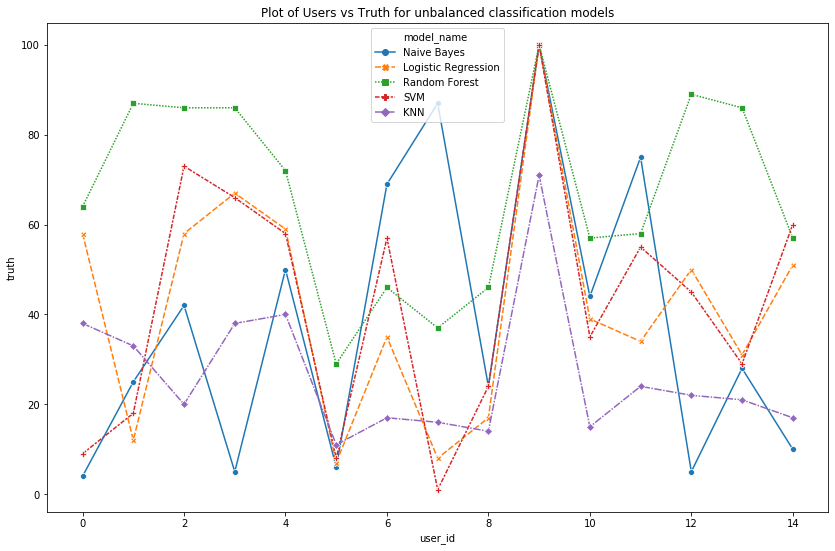

In [51]:
plt.figure(figsize=(14,9))
plt.title('Plot of Users vs Truth for unbalanced classification models')
sns.lineplot(x='user_id', y='truth', hue='model_name', style='model_name', data=model_results, markers=True)

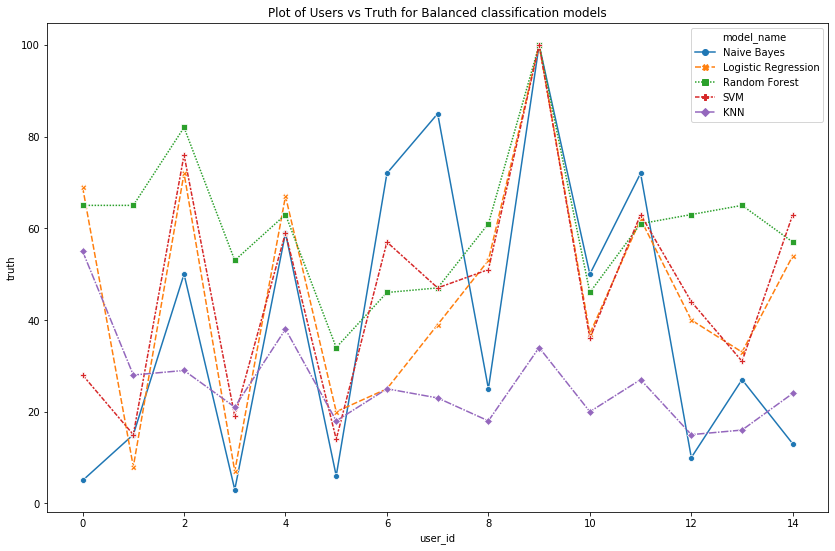

In [68]:
plt.figure(figsize=(14,9))
plt.title('Plot of Users vs Truth for Balanced classification models')
sns.lineplot(x='user_id', y='truth', hue='model_name', style='model_name', data=model_balanced_results, markers=True)